# ***K-means Klustring på Syntetisk Data: En Nybörjarguide***
---
I denna notebook kommer vi att utföra följande steg:

1. Vad är klustring och K-Means dess bettydelse och användning
2. Generera syntetisk data med make_blobs()
3. Implementera K-means klustring
4. Visualisera resultaten
5. Experimentera med olika antal kluster
---

### *Vad är klustring?*

Klustring är en typ av ***omärkt*** maskininlärning, vilket betyder att vi har data men ingen färdig etikett (svar) för varje datapunkt. </br>Vi använder klustring för att hitta mönster eller grupperingar i data. Algoritmen försöker dela upp datapunkterna i olika kluster baserat på deras likheter.

### *Vad är K-Means?*

K-Means är en klustringsalgoritm som delar upp data i ***K*** grupper, eller kluster. Här är en enkel beskrivning av hur det fungerar:

- ***K*** står för antalet kluster vi vill hitta (du bestämmer antalet kluster innan du kör algoritmen).
- ***Means*** betyder medelvärde. Varje kluster representeras av medelvärdet av alla datapunkter som tillhör det klustret, vilket vi kallar för klustrets "centrum" (centroid).

### *Hur fungerar K-Means?*

K-Means-klustring fungerar i några enkla steg:

- Välj antal kluster (***K***): Du bestämmer hur många grupper du vill ha. 
- Slumpa startpositioner: Algoritmen väljer slumpmässigt ***K*** startpositioner (centroider) för varje kluster.
- Tilldela datapunkter: Varje datapunkt tilldelas det närmaste centret.
- Uppdatera centrum: För varje kluster, beräkna medelvärdet av alla punkter i det klustret och uppdatera klustrets centrum till den nya positionen.
- Upprepa tills stabilt: Algoritmen fortsätter att tilldela punkter och uppdatera centrum tills klustren inte förändras längre.

### *Syntetisk data*

Syntetisk data är data som vi själva skapar. Den är inte verklig, men används för att testa algoritmer på ett kontrollerat sätt. </br>Du kan t.ex. skapa datapunkter i olika grupper med olika egenskaper, och sedan använda K-Means för att se om algoritmen korrekt hittar dessa grupper.
- Varför syntetisk data?
    - Att använda syntetisk data är bra när vi vill öva och testa algoritmer som K-Means, eftersom vi har full kontroll över datans struktur och </br>kan visuellt se hur algoritmen fungerar. På så sätt lär man sig lättare hur klustring fungerar i praktiken.

### Varför använda K-Means och när?

K-Means används när vi vill hitta mönster i data och dela upp det i grupper utan att vi i förväg vet vilka grupper som finns. Det används ofta inom:

- ***Marknadssegmentering***: Dela upp kunder i grupper baserat på deras köpvanor.
- ***Bildsegmentering***: Dela upp en bild i olika delar baserat på färg eller textur.
- ***Förenkling av stora dataset***: Dela upp ett stort dataset i mindre, lättare hanterbara grupper.
- ***Anomalidetektering***: Identifiera avvikande datapunkter genom att se om de ligger långt ifrån sina kluster.

In [5]:
# Vi börjer implementera nödvändiga bibliotek
import numpy as np                          # type: ignore
import matplotlib.pyplot as plt             # type: ignore
from sklearn.datasets import make_blobs     # type: ignore
from sklearn.cluster import KMeans          # type: ignore

# Skapa syntetisk data med 3 kluster
# n_samples=300 – Detta parameter bestämmer hur många datapunkter som ska genereras i det syntetiska datasetet.
# centers=3  Indikerar att vi vill skapa 3 olika kluster.
# random_state=42 detta garanterar att vi får samma slumpmässiga startpositioner vid varje körning.
# cluster_std bestämmer hur spridda eller täta datapunkterna i varje kluster är.
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

In [6]:
# Skapa en K-Means-modell med 3 kluster
# n_clusters=3, vilket betyder att vi vill hitta tre grupper 
# random_state=42 detta garanterar att vi får samma slumpmässiga startpositioner vid varje körning.
kmeans = KMeans(n_clusters=3, random_state=42)

# Träna modellen, datapunkter tilldelas de närmaste klustren
kmeans.fit(X)

# Gör förutsägelser och placera datapunkterna i de slutgiltiga klustren
y_kmeans = kmeans.predict(X)

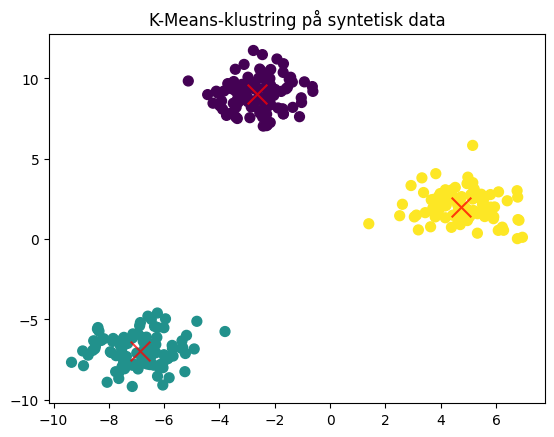

In [9]:
# Visualisera resultaten
# plt.scatter(): Plottar varje datapunkt i datasetet. Varje punkt färgas baserat på vilket kluster den tillhör (angivet av c=y).
# cmap='viridis': Färgkarta för att visualisera de olika klustren.
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Rita klustermedelvärdena (centroider)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("K-Means-klustring på syntetisk data")
plt.show()

### Lite förklaring vad gör koden nere: 
 ***plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')***
- **X[:, 0]**: Denna notation betyder att du tar alla rader i din data (:) men bara den första kolumnen (0)
- **X[:, 1]**: Här tar du alla rader i din data men bara den andra kolumnen (1)
    - Dessa två kolumner representerar koordinaterna (x- och y-värdena) för varje datapunkt i tvådimensionellt utrymme. 
    - Så ***X[:, 0]*** är x-koordinaterna, och ***X[:, 1]*** är y-koordinaterna.
- **c=y_pred**: 
    - ***c*** står för "color" och används för att färga datapunkterna i grafen
    - ***y_pred***: Detta är de klusteretiketter som K-Means-algoritmen har tilldelat varje datapunkt. Varje punkt får en färg beroende på vilken klustretikett den har.
- **cmap='viridis'**: 
    - ***cmap*** står för "colormap", vilket är färgschemat som används för att färga datapunkterna.
    - ***'viridis'*** är ett specifikt färgschema som ofta används för att representera olika kategorier eller kluster.

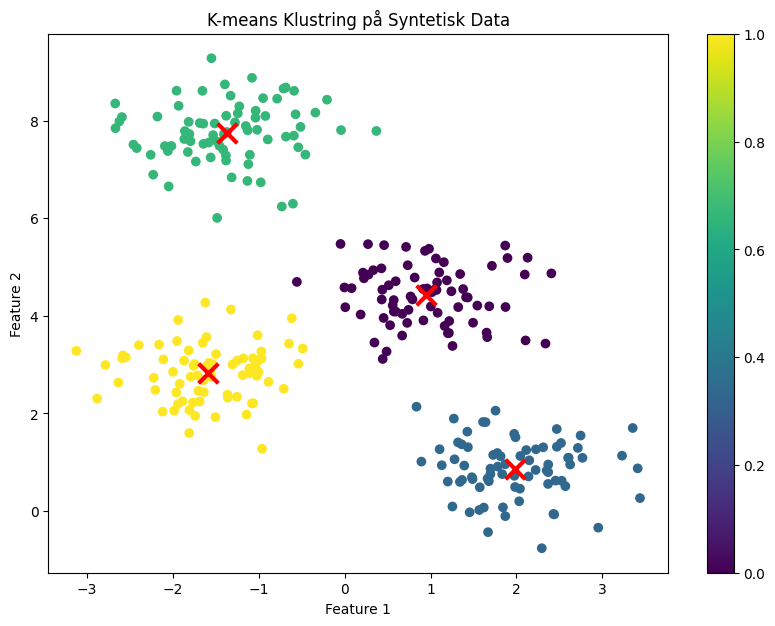

In [10]:
# Skapa syntetisk data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Tillämpa K-means
kmeans = KMeans(n_clusters=4, random_state=0)
y_pred = kmeans.fit_predict(X)

# Visualisera resultatet
plt.figure(figsize=(10, 7))

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='x', s=200, linewidths=3, color='r')
plt.title("K-means Klustring på Syntetisk Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()

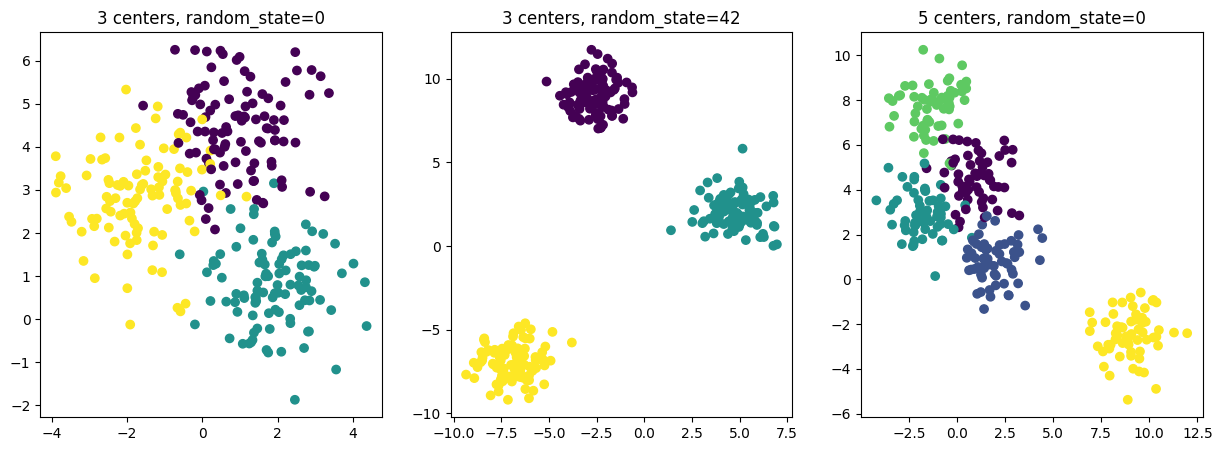

In [11]:
# Generera data med 3 centers och random_state=0
X1, y1 = make_blobs(n_samples=300, centers=3, random_state=0)

# Generera data med 3 centers och random_state=42
X2, y2 = make_blobs(n_samples=300, centers=3, random_state=42)

# Generera data med 5 centers och random_state=0
X3, y3 = make_blobs(n_samples=300, centers=5, random_state=0)

# Plotta resultaten
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(X1[:, 0], X1[:, 1], c=y1)
ax1.set_title('3 centers, random_state=0')

ax2.scatter(X2[:, 0], X2[:, 1], c=y2)
ax2.set_title('3 centers, random_state=42')

ax3.scatter(X3[:, 0], X3[:, 1], c=y3)
ax3.set_title('5 centers, random_state=0')

plt.show()